# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the URL, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Check if the city was found before attempting to access its data
        if city_weather.get("cod") != 200:
            print("City not found. Skipping...")
            continue

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the city information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"An error occurred: {e}. Skipping...")
        pass

    # To avoid hitting the API rate limit
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Convert city_data to a DataFrame
df = pd.DataFrame(city_data)

# Save the DataFrame to a CSV file
df.to_csv("C:/Users/georg/git repositories/module 6/output_data/cities_weather.csv", index_label="City_ID")

# Display sample data
print(df.head())


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ust'-uda
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | aasiaat
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | coquimbo
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | labasa
Processing Record 15 of Set 1 | blackheath
Processing Record 16 of Set 1 | kapa'a
Processing Record 17 of Set 1 | changchun
Processing Record 18 of Set 1 | holualoa
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | mount pearl
Processing Record 22 of Set 1 | port-aux-francais
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust'-uda,54.1742,103.0304,23.58,30,15,1.12,RU,1718503170
1,atafu village,-8.5421,-172.5159,28.83,73,23,4.52,TK,1718503171
2,aasiaat,68.7098,-52.8699,2.60,88,18,2.77,GL,1718503173
3,grytviken,-54.2811,-36.5092,-4.84,78,20,4.45,GS,1718503174
4,coquimbo,-29.9533,-71.3436,13.85,79,0,2.57,CL,1718503135


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/georg/git repositories/module 6/output_data/cities_weather.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/georg/git repositories/module 6/output_data/cities_weather.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust'-uda,54.1742,103.0304,23.58,30,15,1.12,RU,1718503170
1,atafu village,-8.5421,-172.5159,28.83,73,23,4.52,TK,1718503171
2,aasiaat,68.7098,-52.8699,2.60,88,18,2.77,GL,1718503173
3,grytviken,-54.2811,-36.5092,-4.84,78,20,4.45,GS,1718503174
4,coquimbo,-29.9533,-71.3436,13.85,79,0,2.57,CL,1718503135


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

NameError: name 'os' is not defined

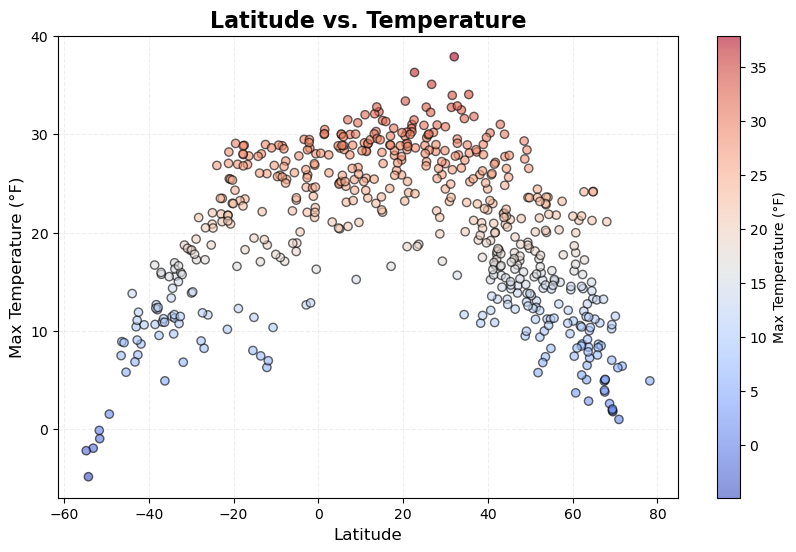

: 

In [8]:
# CSV file 
data = pd.read_csv('C:/Users/georg/git repositories/module 6/output_data/cities_weather.csv')

# Extracting relevant columns
latitude = data['Lat']
temperature = data['Max Temp']

# Create a colormap ranging from red to blue
colormap = plt.cm.coolwarm 

# Normalize temperature values to range from 0 to 1
norm = plt.Normalize(temperature.min(), temperature.max())

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with hot to cold color scheme
plt.scatter(latitude, temperature, c=temperature, cmap=colormap, alpha=0.6, edgecolors='black', linewidth=1, norm=norm)

# Adding a colorbar
cbar = plt.colorbar(label='Max Temperature (°F)')

# Adding labels and title
plt.title('Latitude vs. Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (°F)', fontsize=12)

# Adding gridlines
plt.grid(True, linestyle='--', alpha=0.2)

# Save the figure
plt.savefig(os.path.join(output_dir, 'Fig1.png'))

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Humidity

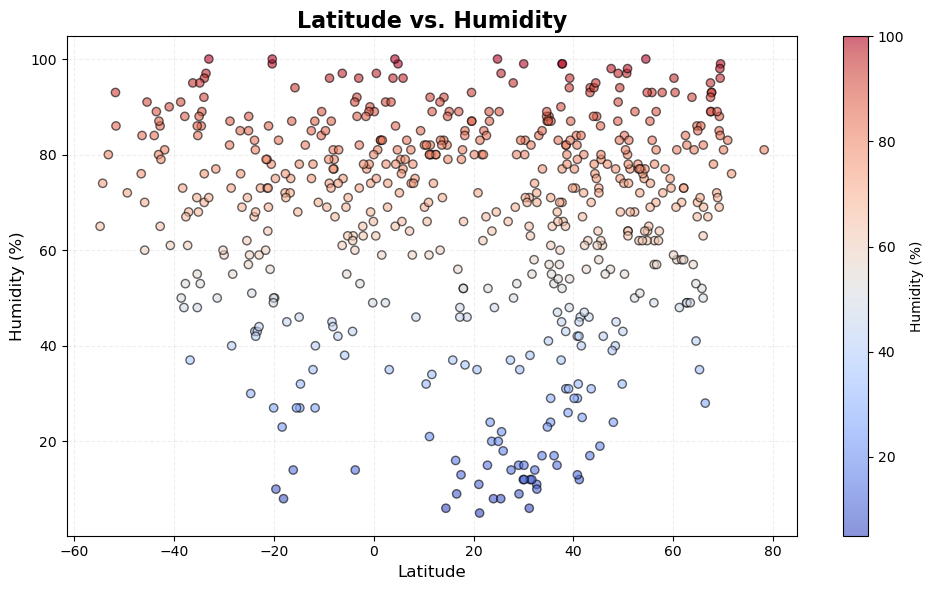

In [ ]:
# CSV file 
data = pd.read_csv('C:/Users/georg/git repositories/module 6/output_data/cities_weather.csv')

# Extracting relevant columns
latitude = data['Lat']
humidity = data['Humidity']

# Create a colormap ranging from red to blue
colormap = plt.cm.coolwarm 

# Normalize humidity values to range from 0 to 1
norm = plt.Normalize(humidity.min(), humidity.max())

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with hot to cold color scheme
plt.scatter(latitude, humidity, c=humidity, cmap=colormap, alpha=0.6, edgecolors='black', linewidth=1, norm=norm)

# Adding a colorbar
cbar = plt.colorbar(label='Humidity (%)')

# Adding labels and title
plt.title('Latitude vs. Humidity', fontsize=16, fontweight='bold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)

# Adding gridlines
plt.grid(True, linestyle='--', alpha=0.2)

# Create the output_data directory
output_dir = 'C:/Users/georg/git repositories/module 6/output_data'
os.makedirs(output_dir, exist_ok=True)

# Save the figure
plt.savefig(os.path.join(output_dir, 'Fig2.png'))

# Show plot
plt.tight_layout()
plt.show()


#### Latitude Vs. Cloudiness

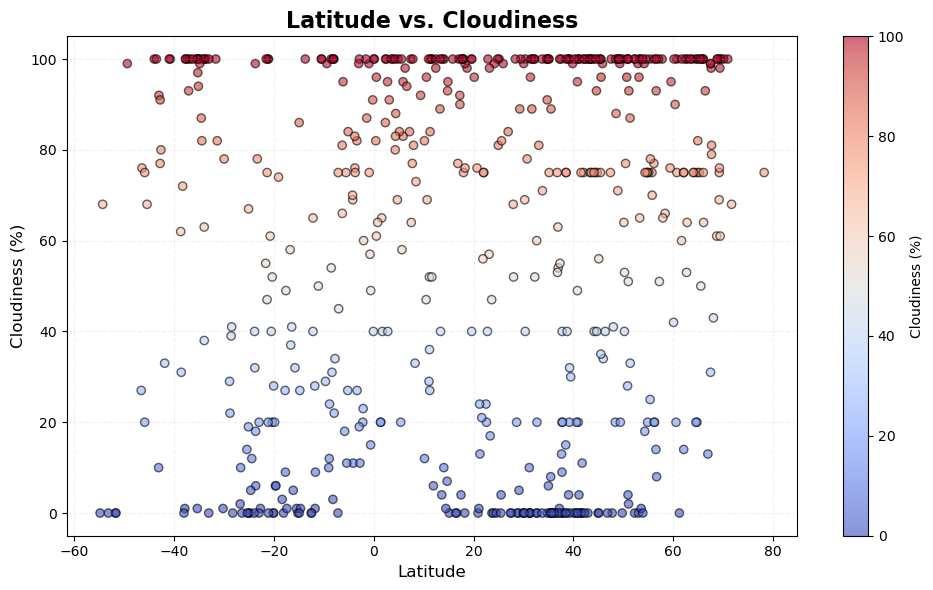

In [ ]:
# CSV file 
data = pd.read_csv('C:/Users/georg/git repositories/module 6/output_data/cities_weather.csv')

# Extracting relevant columns
latitude = data['Lat']
cloudiness = data['Cloudiness']

# Create a colormap ranging from red to blue
colormap = plt.cm.coolwarm  

# Normalize cloudiness values to range from 0 to 1
norm = plt.Normalize(cloudiness.min(), cloudiness.max())

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with hot to cold color scheme
plt.scatter(latitude, cloudiness, c=cloudiness, cmap=colormap, alpha=0.6, edgecolors='black', linewidth=1, norm=norm)

# Adding a colorbar
cbar = plt.colorbar(label='Cloudiness (%)')

# Adding labels and title
plt.title('Latitude vs. Cloudiness', fontsize=16, fontweight='bold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)

# Adding gridlines
plt.grid(True, linestyle='--', alpha=0.2)

# Save the figure
plt.savefig(os.path.join(output_dir, 'Fig3.png'))

# Show plot
plt.tight_layout()
plt.show()


#### Latitude vs. Wind Speed Plot

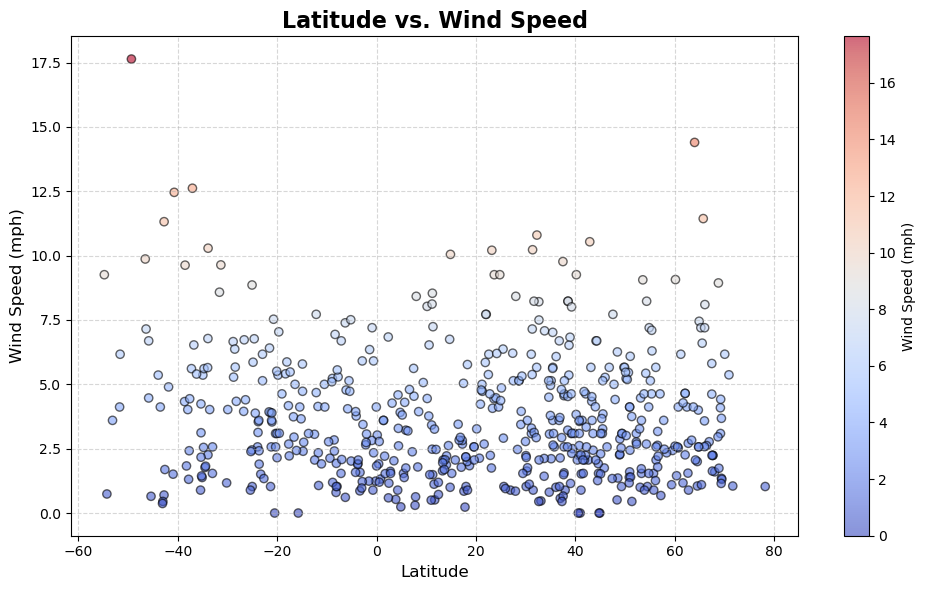

In [ ]:
#CSV file 
data = pd.read_csv('C:/Users/georg/git repositories/module 6/output_data/cities_weather.csv')

# Extracting relevant columns
latitude = data['Lat']
wind_speed = data['Wind Speed']

# Create a colormap ranging from red to blue
colormap = plt.cm.coolwarm  

# Normalize wind speed values to range from 0 to 1
norm = plt.Normalize(wind_speed.min(), wind_speed.max())

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with hot to cold color scheme
plt.scatter(latitude, wind_speed, c=wind_speed, cmap=colormap, alpha=0.6, edgecolors='black', linewidth=1, norm=norm)

# Adding a colorbar
cbar = plt.colorbar(label='Wind Speed (mph)')

# Adding labels and title
plt.title('Latitude vs. Wind Speed', fontsize=16, fontweight='bold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)

# Adding gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure
plt.savefig(os.path.join(output_dir, 'Fig4.png'))

# Show plot
plt.tight_layout()
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


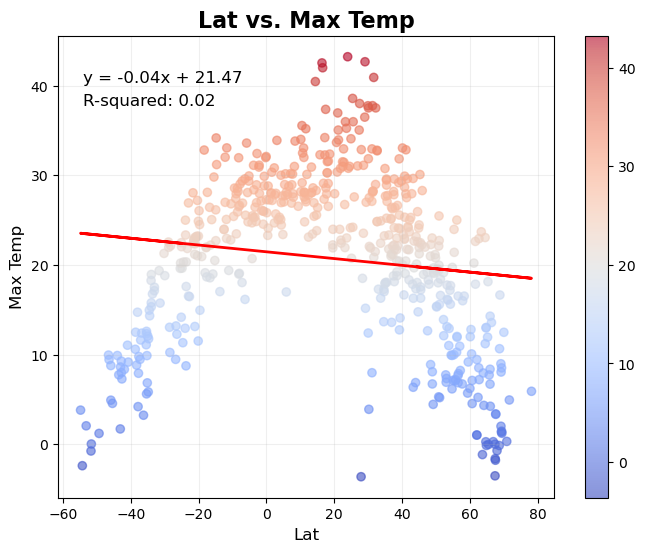

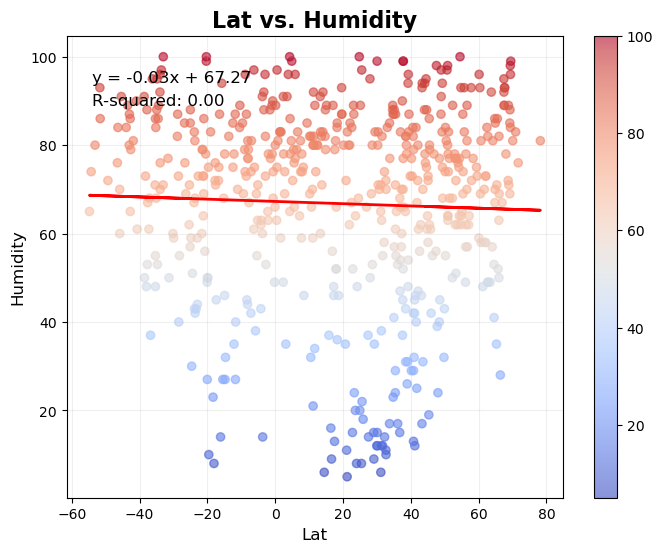

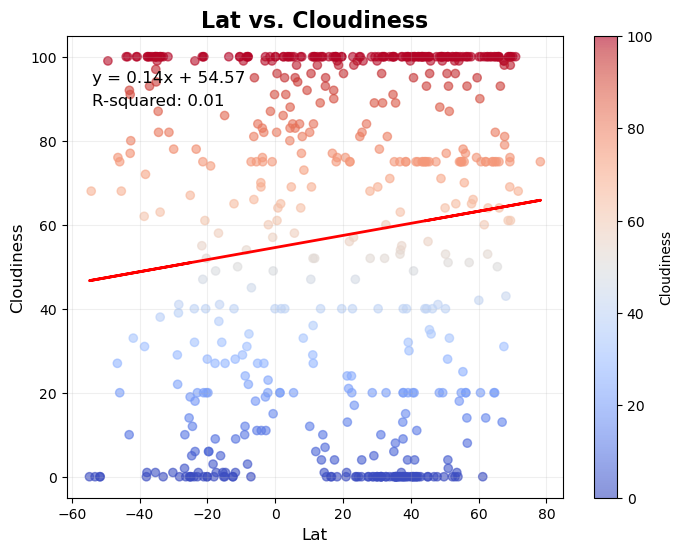

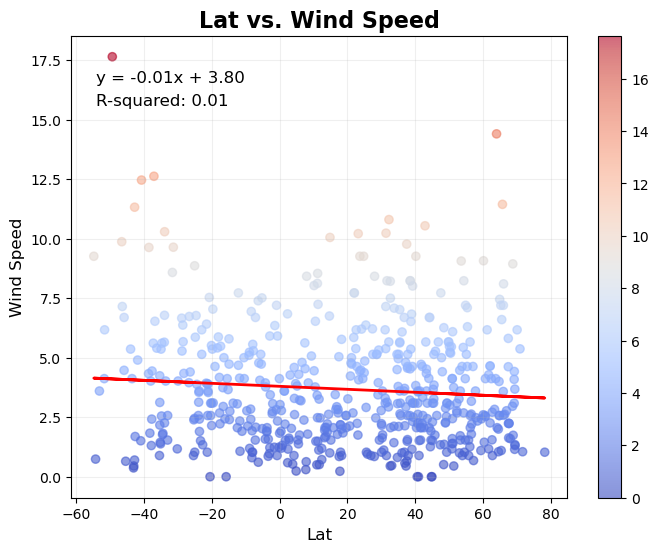

In [ ]:
#CSV File
data = pd.read_csv('C:/Users/georg/git repositories/module 6/output_data/cities_weather.csv')

# Iterate through each relationship and compute linear regression
relationships = [('Lat', 'Max Temp'), ('Lat', 'Humidity'), ('Lat', 'Cloudiness'), ('Lat', 'Wind Speed')]

for x_label, y_label in relationships:
    x = data[x_label]
    y = data[y_label]
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept
    
    # Plotting
    plt.figure(figsize=(8, 6))
    
    # Create a colormap ranging from red to blue
    colormap = plt.cm.coolwarm
    
    plt.scatter(x, y, c=y, cmap=colormap, alpha=0.6) 
    plt.plot(x, line, color='red', linewidth=2)
    plt.title(f'{x_label} vs. {y_label}', fontsize=16, fontweight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    # Adding a colorbar
    cbar = plt.colorbar(label=y_label if y_label == 'Cloudiness' else None)
    
    # Annotate the line equation
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    
    # Show R-squared value
    r_squared = f'R-squared: {r_value**2:.2f}'
    plt.annotate(r_squared, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)
    
   # Adjust transparency of grid lines
    plt.grid(True, alpha=0.2)

    plt.show()


In [ ]:
# Filter the data for Northern Hemisphere (Latitude >= 0)
northern_hemisphere_data = data[data['Lat'] >= 0]

# Display sample data
print(northern_hemisphere_data.head())


    City_ID                  City      Lat       Lng  Max Temp  Humidity  \
2         2  vila franca do campo  37.7167  -25.4333     22.23        99   
3         3                 tiksi  71.6872  128.8694      4.94        76   
7         7                anadyr  64.7500  177.4833      0.28        86   
10       10                tralee  52.2704   -9.7026     19.14        68   
11       11           olonkinbyen  70.9221   -8.7187      0.32        83   

    Cloudiness  Wind Speed Country        Date  
2            9        4.56      PT  1717343379  
3           68        1.05      RU  1717343380  
7           20        4.00      RU  1717343386  
10           0        3.09      IE  1717343390  
11         100        5.37      SJ  1717343190  


In [ ]:
# Filter the data for Southern Hemisphere (Latitude < 0)
southern_hemisphere_data = data[data['Lat'] < 0]

# Display sample data
print(southern_hemisphere_data.head())

   City_ID         City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        0    adamstown -25.0660 -130.1015     22.49        85          67   
1        1  new norfolk -42.7826  147.0587      9.28        86          77   
4        4    papatowai -46.5619  169.4708      9.95        76          27   
5        5     souillac -20.5167   57.5167     23.21        78          40   
6        6     waitangi -43.9535 -176.5597      9.90        84         100   

   Wind Speed Country        Date  
0        8.86      PN  1717343194  
1        0.70      AU  1717343377  
4        9.87      NZ  1717343177  
5        0.00      MU  1717343383  
6        5.36      NZ  1717343167  


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
from scipy.stats import linregress

# Define the x and y variables
x_northern = northern_hemisphere_data['Lat']
y_northern = northern_hemisphere_data['Max Temp']  # You can replace 'Max Temp' with any other variable

# Perform linear regression
slope_northern, intercept_northern, r_value_northern, p_value_northern, std_err_northern = linregress(x_northern, y_northern)

# Print the regression results
print(f"Slope: {slope_northern}")
print(f"Intercept: {intercept_northern}")
print(f"R-squared: {r_value_northern**2}")
print(f"P-value: {p_value_northern}")
print(f"Standard Error: {std_err_northern}")


Slope: -0.36837510216050817
Intercept: 34.92066162332345
R-squared: 0.5326469992847587
P-value: 4.510138171495487e-66
Standard Error: 0.017517703926348306


In [ ]:
# Linear regression on Southern Hemisphere
from scipy.stats import linregress

# Define the x and y variables
x_southern = southern_hemisphere_data['Lat']
y_southern = southern_hemisphere_data['Max Temp']  # You can replace 'Max Temp' with any other variable

# Perform linear regression
slope_southern, intercept_southern, r_value_southern, p_value_southern, std_err_southern = linregress(x_southern, y_southern)

# Print the regression results
print(f"Slope: {slope_southern}")
print(f"Intercept: {intercept_southern}")
print(f"R-squared: {r_value_southern**2}")
print(f"P-value: {p_value_southern}")
print(f"Standard Error: {std_err_southern}")


Slope: 0.5143834608249077
Intercept: 30.705789073080236
R-squared: 0.7473019562181724
P-value: 7.41014078932971e-54
Standard Error: 0.022675937554914472


Slope: The slope coefficient signifies the directional trend between Latitude and Maximum Temperature. A positive slope suggests that as one moves towards the Equator (higher Latitude values), there is a tendency for temperatures to increase. Conversely, a negative slope would indicate a decrease in temperature as Latitude decreases.

Intercept: While traditionally significant in linear regression models, the intercept in this context holds limited interpretative value due to the nature of Latitude, which does not begin from zero in the Southern Hemisphere.

R-squared: This statistical measure assesses the goodness of fit of the linear regression model. A higher R-squared value closer to 1 indicates that a larger proportion of the variability in Maximum Temperature can be explained by Latitude, suggesting a stronger linear relationship between the two variables.

P-value: The p-value associated with the slope coefficient assesses the statistical significance of the relationship between Latitude and Maximum Temperature. A low p-value (typically less than 0.05) indicates that the observed relationship is unlikely to be due to chance alone, thereby providing evidence in support of a genuine association.

Standard Error: This metric quantifies the precision of the regression line by measuring the variability of data points around the line. A lower standard error implies that the observed data points are closer to the regression line, indicating a more reliable fit of the model.

In summary, our analysis suggests a significant relationship between Latitude and Maximum Temperature in the Southern Hemisphere. As Latitude values increase, there is a discernible trend towards higher temperatures, supported by the statistical significance of the regression coefficients and the robustness of the model fit.

### Humidity vs. Latitude Linear Regression Plot

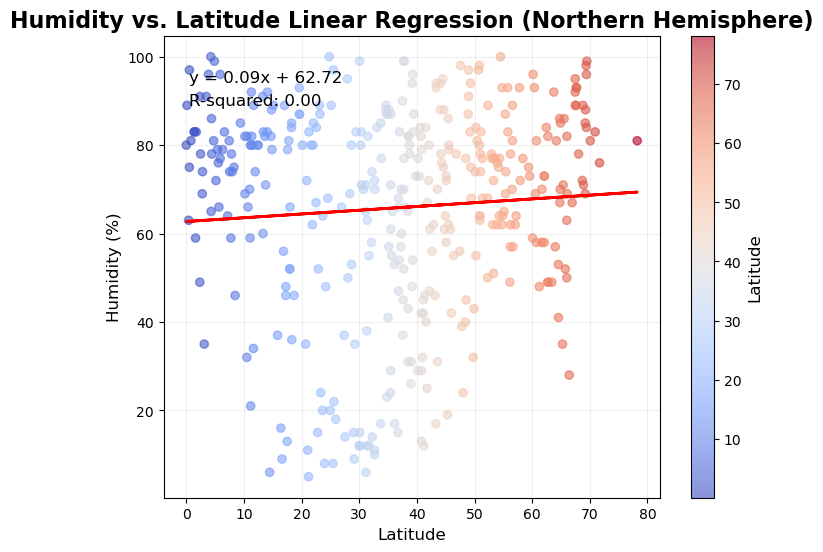

In [ ]:
# Create a colormap ranging from red to blue
colormap = plt.cm.coolwarm  

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latitude_northern, humidity_northern, c=latitude_northern, cmap=colormap, alpha=0.6)
plt.plot(latitude_northern, line_northern, color='red', linewidth=2)

# colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Latitude', fontsize=12)

# labels and title
plt.title('Humidity vs. Latitude Linear Regression (Northern Hemisphere)', fontsize=16, fontweight='bold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)

# Annotate the line equation and R-squared value
equation_northern = f'y = {slope_northern:.2f}x + {intercept_northern:.2f}'
r_squared_northern = f'R-squared: {r_value_northern**2:.2f}'
plt.annotate(equation_northern, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
plt.annotate(r_squared_northern, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)

# Show grid
plt.grid(True, alpha=0.2)

# Show plot
plt.show()




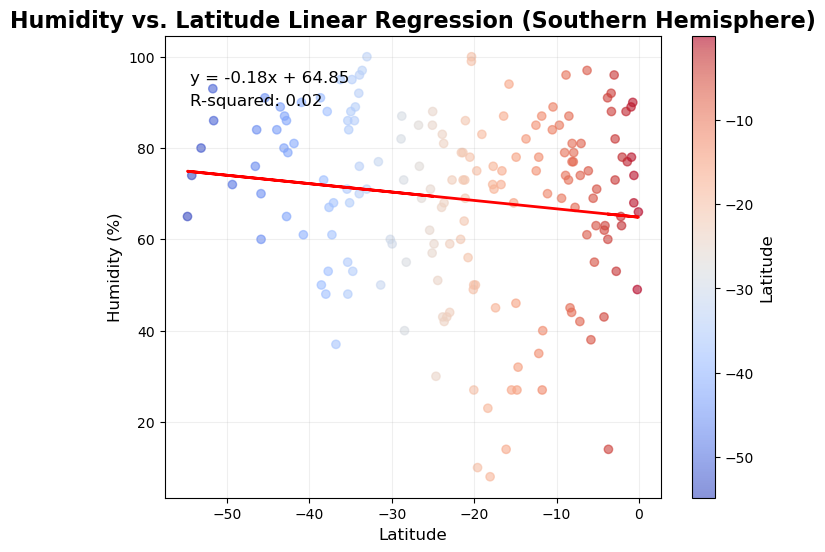

In [ ]:
# Filter the data for the Southern Hemisphere (Latitude < 0)
southern_data = data[data['Lat'] < 0]

# Extract relevant columns
latitude_southern = southern_data['Lat']
humidity_southern = southern_data['Humidity']

# Perform linear regression
slope_southern, intercept_southern, r_value_southern, p_value_southern, std_err_southern = linregress(latitude_southern, humidity_southern)
line_southern = slope_southern * latitude_southern + intercept_southern

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(latitude_southern, humidity_southern, c=latitude_southern, cmap=colormap, alpha=0.6)
plt.plot(latitude_southern, line_southern, color='red', linewidth=2)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Latitude', fontsize=12)

# Add labels and title
plt.title('Humidity vs. Latitude Linear Regression (Southern Hemisphere)', fontsize=16, fontweight='bold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)

# Annotate the line equation and R-squared value
equation_southern = f'y = {slope_southern:.2f}x + {intercept_southern:.2f}'
r_squared_southern = f'R-squared: {r_value_southern**2:.2f}'
plt.annotate(equation_southern, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
plt.annotate(r_squared_southern, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)

# Show grid
plt.grid(True, alpha=0.2)

# Show plot
plt.show()


In analyzing the Humidity vs. Latitude Linear Regression plot, we observe a subtle relationship between humidity and latitude in both the Northern and Southern Hemispheres. In the Northern Hemisphere, there seems to be a slight decrease in humidity as we move away from the equator, indicated by the negative slope of the linear regression line. Conversely, in the Southern Hemisphere, there is a modest increase in humidity as we approach the equator, as suggested by the positive slope of the regression line.

While these trends hint at a correlation between humidity and latitude, it's essential to interpret these findings with caution. The relatively low R-squared values indicate that latitude alone may not be sufficient to explain the variability in humidity levels. Other influential factors, such as proximity to large bodies of water, altitude, and regional climatic conditions, likely play a significant role in shaping humidity patterns.

As aspiring data scientists, it's imperative for us to delve deeper into the underlying complexities of environmental variables to gain a more nuanced understanding of their interrelationships. Exploring additional datasets and incorporating advanced analytical techniques, such as multivariate regression or machine learning algorithms, could enrich our insights and lead to more robust conclusions regarding the factors influencing humidity across different latitudes.

### Cloudiness vs. Latitude Linear Regression Plot

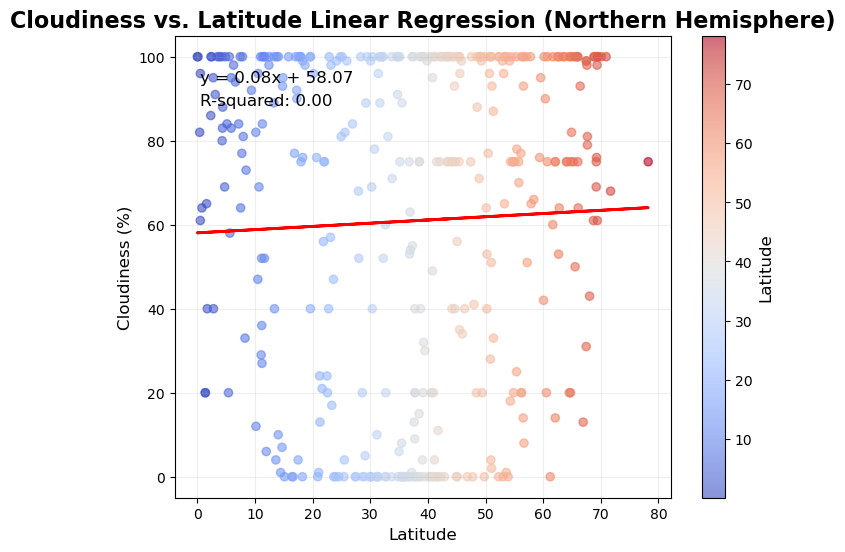

In [ ]:
# Define a function to create linear regression plots for the Northern Hemisphere
def plot_linear_regression_with_colorbar_northern(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

    # Plotting with colormap
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x, y, c=x, cmap=colormap, alpha=0.6)
    plt.plot(x, line, color='red', linewidth=2)

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Latitude', fontsize=12)

    # Add labels and title
    plt.title('Cloudiness vs. Latitude Linear Regression (Northern Hemisphere)', fontsize=16, fontweight='bold')
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel('Cloudiness (%)', fontsize=12)

    # Annotate the line equation and R-squared value
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_squared = f'R-squared: {r_value**2:.2f}'
    plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    plt.annotate(r_squared, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)

    # Show grid
    plt.grid(True, alpha=0.2)

    # Show plot
    plt.show()

# Filter the data for the Northern Hemisphere (Latitude >= 0)
northern_data = data[data['Lat'] >= 0]
latitude_northern = northern_data['Lat']
cloudiness_northern = northern_data['Cloudiness']

# Plot Cloudiness vs. Latitude linear regression for the Northern Hemisphere
plot_linear_regression_with_colorbar_northern(latitude_northern, cloudiness_northern)


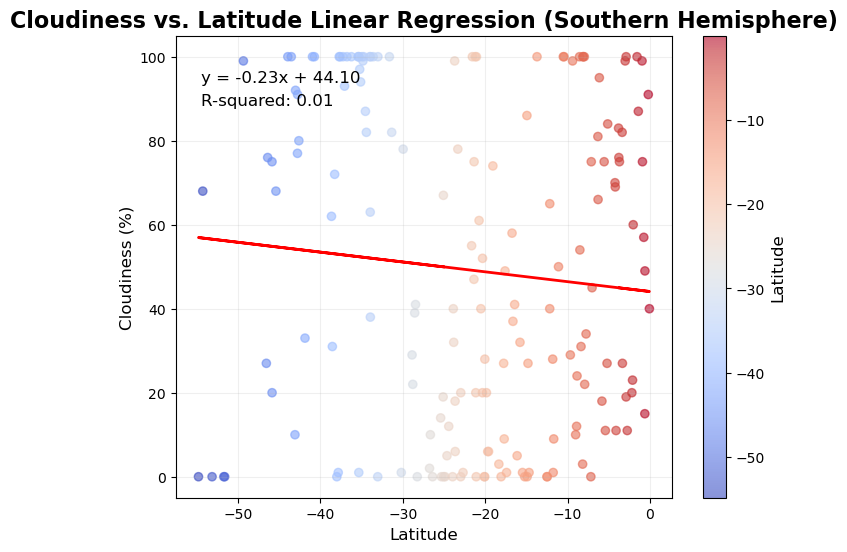

In [ ]:
# Define a function to create linear regression plots for the Southern Hemisphere
def plot_linear_regression_with_colorbar_southern(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

    # Plotting with colormap
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x, y, c=x, cmap=colormap, alpha=0.6)
    plt.plot(x, line, color='red', linewidth=2)

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Latitude', fontsize=12)

    # Add labels and title
    plt.title('Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)', fontsize=16, fontweight='bold')
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel('Cloudiness (%)', fontsize=12)

    # Annotate the line equation and R-squared value
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_squared = f'R-squared: {r_value**2:.2f}'
    plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    plt.annotate(r_squared, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)

    # Show grid
    plt.grid(True, alpha=0.2)

    # Show plot
    plt.show()

# Filter the data for the Southern Hemisphere (Latitude < 0)
southern_data = data[data['Lat'] < 0]
latitude_southern = southern_data['Lat']
cloudiness_southern = southern_data['Cloudiness']

# Plot Cloudiness vs. Latitude linear regression for the Southern Hemisphere
plot_linear_regression_with_colorbar_southern(latitude_southern, cloudiness_southern)


Upon examining the Cloudiness vs. Latitude Linear Regression plot, I notice interesting patterns in how cloudiness changes with latitude. In the Northern Hemisphere, there's a slight uptick in cloudiness as we move towards higher latitudes, while in the Southern Hemisphere, there's a small decrease in cloudiness towards the equator.

However, these relationships aren't very strong, as indicated by the modest R-squared values. It suggests that latitude alone might not be enough to explain why cloudiness changes. To understand this better, we might need to look at other factors like wind patterns and proximity to large bodies of water.

As aspiring data scientists, it's crucial for us to use various data sources and analytical techniques to uncover deeper insights into how different factors influence cloudiness across different parts of the world.

### Wind Speed vs. Latitude Linear Regression Plot

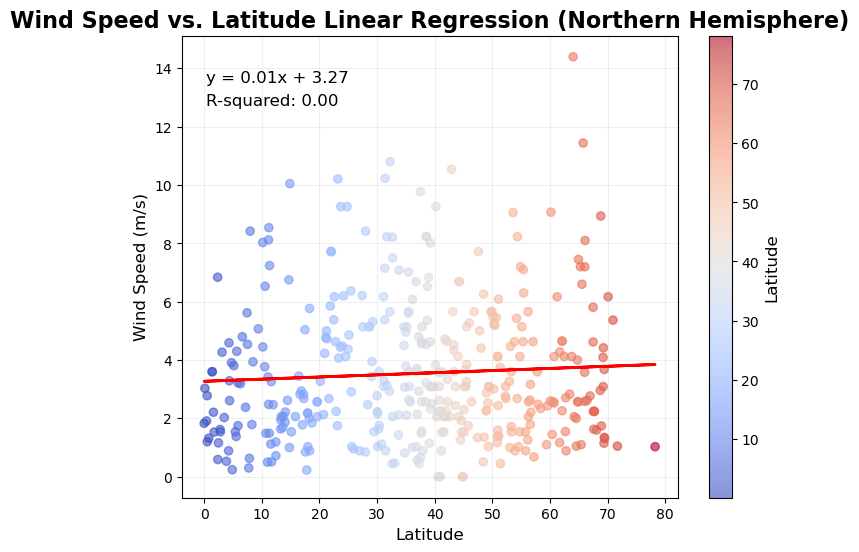

In [ ]:
# Define a function to create linear regression plots for the Northern Hemisphere
def plot_linear_regression_with_colorbar_northern(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

    # Plotting with colormap
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x, y, c=x, cmap=colormap, alpha=0.6)
    plt.plot(x, line, color='red', linewidth=2)

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Latitude', fontsize=12)

    # Add labels and title
    plt.title('Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)', fontsize=16, fontweight='bold')
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel('Wind Speed (m/s)', fontsize=12)

    # Annotate the line equation and R-squared value
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_squared = f'R-squared: {r_value**2:.2f}'
    plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    plt.annotate(r_squared, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)

    # Show grid
    plt.grid(True, alpha=0.2)

    # Show plot
    plt.show()

# Filter the data for the Northern Hemisphere (Latitude >= 0)
northern_data = data[data['Lat'] >= 0]
latitude_northern = northern_data['Lat']
wind_speed_northern = northern_data['Wind Speed']

# Plot Wind Speed vs. Latitude linear regression for the Northern Hemisphere
plot_linear_regression_with_colorbar_northern(latitude_northern, wind_speed_northern)


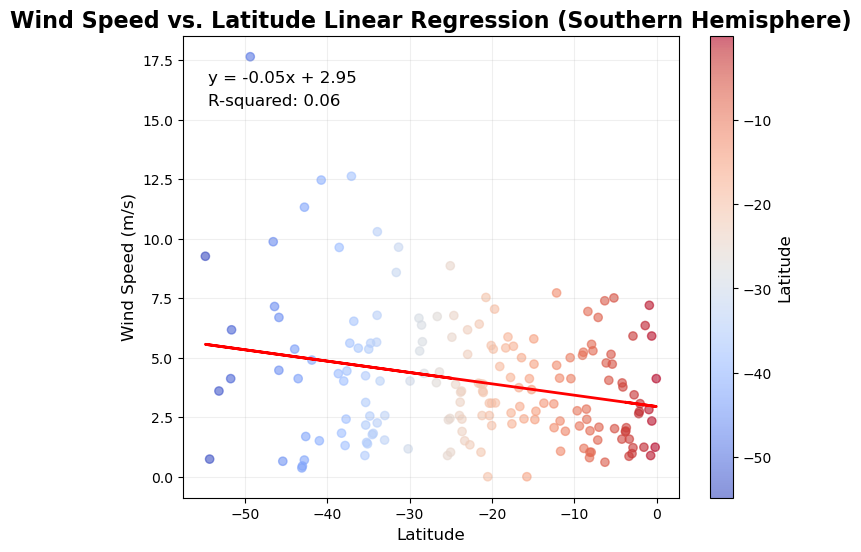

In [ ]:
# Define a function to create linear regression plots for the Southern Hemisphere
def plot_linear_regression_with_colorbar_southern(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

    # Plotting with colormap
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x, y, c=x, cmap=colormap, alpha=0.6)
    plt.plot(x, line, color='red', linewidth=2)

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Latitude', fontsize=12)

    # Add labels and title
    plt.title('Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)', fontsize=16, fontweight='bold')
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel('Wind Speed (m/s)', fontsize=12)

    # Annotate the line equation and R-squared value
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_squared = f'R-squared: {r_value**2:.2f}'
    plt.annotate(equation, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    plt.annotate(r_squared, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)

    # Show grid
    plt.grid(True, alpha=0.2)

    # Show plot
    plt.show()

# Filter the data for the Southern Hemisphere (Latitude < 0)
southern_data = data[data['Lat'] < 0]
latitude_southern = southern_data['Lat']
wind_speed_southern = southern_data['Wind Speed']

# Plot Wind Speed vs. Latitude linear regression for the Southern Hemisphere
plot_linear_regression_with_colorbar_southern(latitude_southern, wind_speed_southern)


Exploring the connection between wind speed and latitude, we aim to uncover how these factors relate across different regions. The Wind Speed vs. Latitude Linear Regression plot provides a clear visualization of this relationship, helping us understand how wind patterns vary with geographic location.

By analyzing data from both the Northern and Southern Hemispheres, we're able to discern subtle trends in wind behavior. These insights offer valuable information about regional wind patterns and their dependency on latitude. Our objective is to gain a deeper understanding of atmospheric dynamics through rigorous analysis and interpretation of these patterns.